# Setup inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline

# Carga fichero

In [2]:
df = pd.read_csv('../data/coches-de-segunda-mano-sample.csv')
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [3]:
df.head(6).to_excel('./DataFrame.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

# Limpieza datos 

In [5]:
# estudiamos nulos marcas

df.fillna({'make':'INVICTA'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             50000 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [6]:
#estudiamos nulos modelos

df.loc[1330,'model'] = 'Córdoba'
df.loc[25574,'model'] = 'Toledo'
df.loc[31826,'model'] = 'Toledo'
df.loc[32831,'model'] = 'León'
df.loc[37683,'model'] = 'Toledo'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             50000 non-null  object 
 3   model            50000 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [7]:
#categorizamos campo kms

df['kms_cat'] = pd.qcut(df.kms,10)
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date,kms_cat
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00,"(192220.0, 241000.0]"
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00,"(25582.2, 51021.0]"
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00,"(99999.0, 127141.4]"
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00,"(99999.0, 127141.4]"
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00,"(99999.0, 127141.4]"


# Brainstorming cuestiones

**Marca**
- ¿Cuántas marcas hay?
- ¿Cuántos coches hay de cada marca?

**Modelo**
- ¿Cuantos modelos hay?
- ¿Cuantos modelos tiene cada marca?
- ¿Cuantos coches hay de cada modelo?


**Precio**
- ¿Cual es la distribución de precios?
- ¿Cual es la marca más cara? 
- ¿Existen conjuntos de marcas con precios similares que se puedan agrupar?
- ¿Cual es el modelo más caro? ¿y el más barato?
- ¿Existen conjuntos de modelos con precios similares que se puedan agrupar?

**Precio financiado**
- ¿Cual es el % de coches que permiten financiación?
- ¿Hay relación de vendedores que permiten financiación?
- ¿Cuál es el % de descuento por financiar? ¿Es fijo por vendedor o varía?

**Combustibles**
- ¿Cual es la distribución de combustibles?
- ¿Cuáles son más baratos?
- A igualdad de modelo, es más barato un diésel o un gasolina?

**Antigüedad**
- ¿Cual es el año medio de los coches anunciados?
- ¿Hay marcas que son significativamente más antiguas o más nuevas? ¿y modelos?
- ¿Existe relación entre antiguedad y precio?

**Kilómetros**
- ¿Cual es la distribución de kilómetros?
- ¿Hay marcas y/o modelos que se venden con más kilómetros que otros? 
- ¿Existe relación entre kilometraje y precio? 
- ¿Existe relación entre kilometraje y año? 
- ¿Se puede apreciar algún salto de precio en función de los kilómetros a igualdad de marca y modelo? ¿y si añadimos el año?

**Número de puertas**
- ¿Cuántos números de puertas distintos tenemos?
- A igualdad de modelo y año, o modelo y kilómetros, ¿existe relación entre precio y número de puertas?

**Caja de cambios**
- ¿Cuantos tipos de cambio distintos hay? 
- ¿Existe relación de precio? 
- ¿Hay relación con alguna variable como el combustible o la marca?

**Color**
- ¿Cuantos colores distintos hay? 
- Distribución de marcas y modelos por color. ¿Hay alguno que destaque? 
- ¿Puede existir alguna relación entre precio y color? ¿y entre año y color?

**Tipo de vendedor**
- ¿Cual es la proporción de vendedores particulares y profesionales? 
- ¿Existe alguna relación con las marcas? 
- A igualdad de modelo, ¿hay diferencias de precio entre particulares y profesionales?
- ¿Existe alguna relación entre el tipo de vendedor y el número de fotos?

**Nombre del vendedor**
- ¿Cuantos vendedores profesionales hay? 
- ¿Hay alguno especializado en alguna marca en especial? 
- ¿Podemos ver que alguno sea más caro que otros? 
- ¿Alguno destaca por poner más fotografías?
- ¿Existe alguna relación entre el precio y el número de fotografías?
- ¿Y entre el número de fotos y la marca y modelo?

**Provincia**
- ¿Cuantos coches se venden en cada provincia? 
- ¿Cual es el precio medio de venta en cada provincia? 
- ¿Se venden más coches de algún color en alguna provincia? 
- ¿En qué provincia se venden los coches con menos km? ¿y con más?

**Fecha de publicación**
- ¿Existe alguna relación entre la fecha de publicación y el precio a igualdad de modelo y kilometraje?

# Preguntas

**Datos Macro**
- Top 10 marcas más vendidas
- Top 15 modelos más vendidos
- Precio medio de coches en venta
- Distribución de combustibles
- Distribución de cajas de cambios
- Distribución colores

**Coche promedio**
- Antigüedad media
- Kilometraje medio
- Potencia media
- Combustible máximo
- Número de puertas máximo
- Caja de cambios máximo
- Color máximo
- Calcular precio para el coche promedio. ¿Se aleja de la media de coches en venta? Intentar justificar el por qué.

**Relaciones características-precio**
- Existe alguna relación entre el tipo de combustible y el precio? A igualdad de antigüedad y kilometraje.
- Existe alguna relación entre la antigüedad y el precio? Le afecta el kilometraje y el combustible?
- Existe alguna relación entre el kilometraje y el precio y el precio? Le afecta la antigüedad y el combustible?

**Datos comerciales**
- Distribución de vendedores profesionales-particulares
- Top 10 vendedores con más anuncios. Precio medio de anuncio en vendedores profesionales. Hay diferencias significativas?
- Existen diferencias de precios entre vendedores profesionales y particulares?

**Datos geográficos**
- Distribución de anuncios por provincia
- Cuál es el precio medio por provincia?
- Top 10 de provincias más caras/baratas. Existen diferencias significativas?
- Distribución de colores vendidos por provincia. Hay algún dato significativo?
- Distribución de combustibles por provincia. Hay algún dato significativo?
- Distribución de antigüedad por provincia. Hay algún dato significativo?
- Dónde se venden más coches eléctricos?

# Análisis

## Datos Macro

- Top 10 marcas más vendidas
- Top 15 modelos más vendidos
- Precio medio de coches en venta
- Distribución de combustibles
- Distribución de cajas de cambios
- Distribución colores

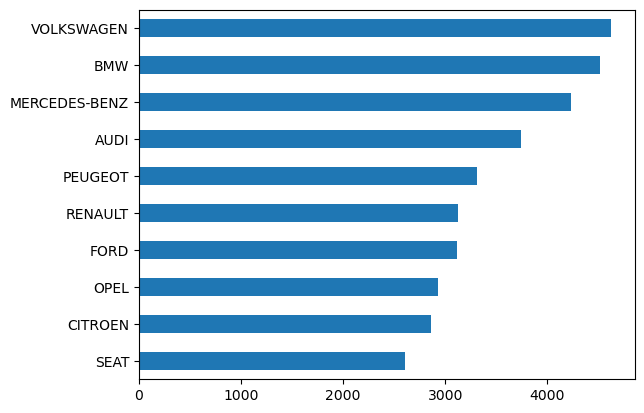

In [8]:
df['make'].value_counts().head(10).sort_values().plot.barh()
plt.savefig('./prueba2.jpg', dpi = 200);

In [9]:
plt.savefig('./prueba2.png')

<Figure size 640x480 with 0 Axes>

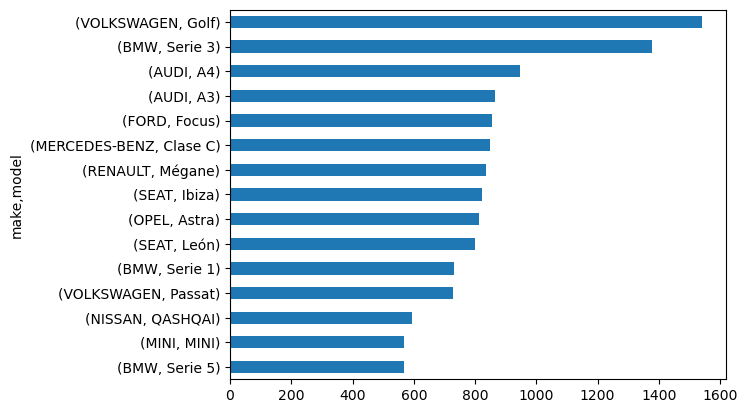

In [10]:
df[['make','model']].value_counts().head(15).sort_values().plot.barh();

In [11]:
round(df['price'].mean(),2)

15166.27

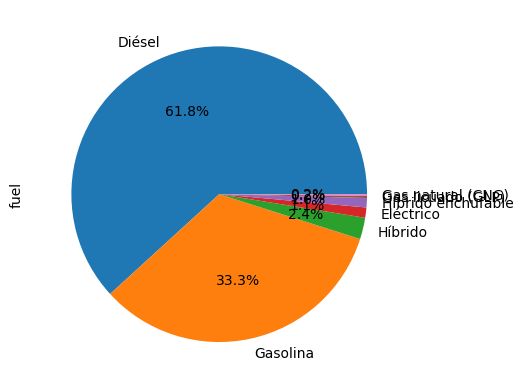

In [12]:
df.fuel.value_counts().plot.pie(autopct='%1.1f%%');

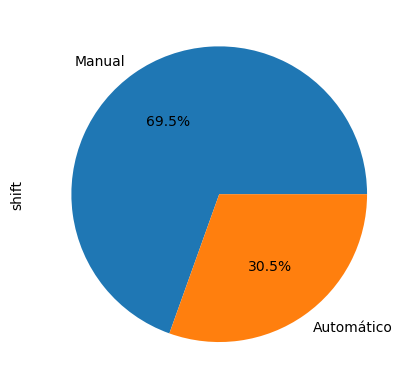

In [13]:
df['shift'].value_counts().plot.pie(autopct='%1.1f%%');

In [14]:
df['color'].nunique()

3565

Hay demasiados colores diferentes por lo que a falta de hacer una limpieza del campo obviaremos todas las preguntas relacionadas con él.

## Coche promedio

- Antigüedad media
- Kilometraje medio
- Potencia media
- Combustible máximo
- Número de puertas máximo
- Caja de cambios máximo
- Color máximo
- Calcular precio para el coche promedio. ¿Se aleja de la media de coches en venta? Intentar justificar el por qué.

In [15]:
print('Antigüedad promedio:',round(df['year'].median()))
print('Kilometraje promedio:', round(df['kms'].median()), 'kms')
print('Potencia promedio:',round(df['power'].median()))
print('Combustible mayoritario:', df[['fuel','doors','shift']].value_counts().head(1).index[0][0])
print('Número de puertas mayoritario:', df[['fuel','doors','shift']].value_counts().head(1).index[0][1])
print('Cambio mayoritario:', df[['fuel','doors','shift']].value_counts().head(1).index[0][2])

Antigüedad promedio: 2015
Kilometraje promedio: 99999 kms
Potencia promedio: 130
Combustible mayoritario: Diésel
Número de puertas mayoritario: 5
Cambio mayoritario: Manual


In [16]:
df[
    #(df.year == df['year'].median()) &
    (df.year <= df['year'].median()+1) & (df.year >= df['year'].median()-1) &
    (df.kms < df['kms'].median()+10000) & (df.kms > df['kms'].median()-10000) &
    (df.power < df['power'].median()+15) & (df.power > df['power'].median()-15) &
    (df['fuel'] == 'Diésel') & 
    (df['doors'] == 5) & 
    (df['shift'] == 'Manual') 
].price.mean()

13731.334905660377

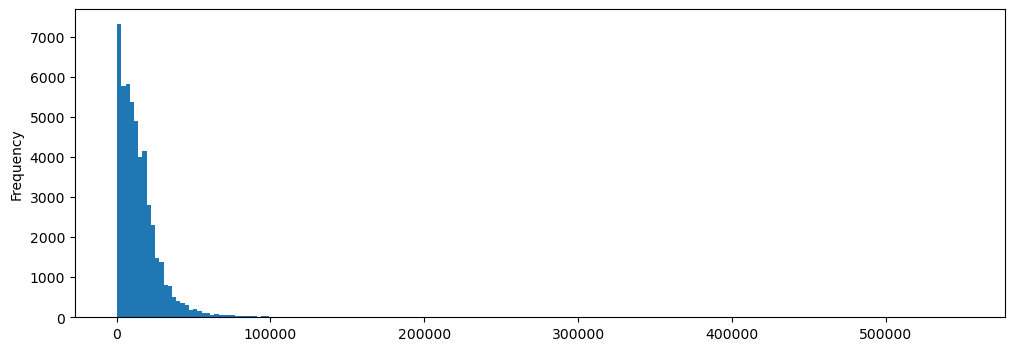

In [17]:
plt.figure(figsize = (12,4))
df.price.plot.hist(bins = 200);

## Relaciones características-precio

- Existe alguna relación entre el tipo de combustible y el precio? A igualdad de antigüedad y kilometraje.
- Existe alguna relación entre la antigüedad y el precio? Le afecta el kilometraje y el combustible?
- Existe alguna relación entre el kilometraje y el precio y el precio? Le afecta la antigüedad y el combustible?
- Existe alguna relación entre el cambio y el precio y el precio? Le afecta la antigüedad y el combustible?

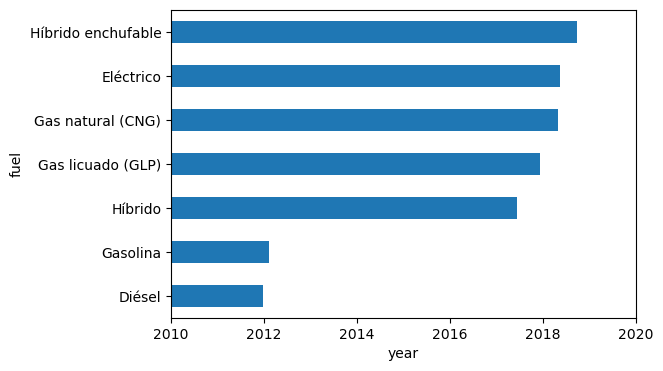

In [18]:
plt.figure(figsize = (6,4))
df.groupby('fuel')['year'].mean().sort_values().plot.barh(xlim = (2010,2020), xlabel = 'year');

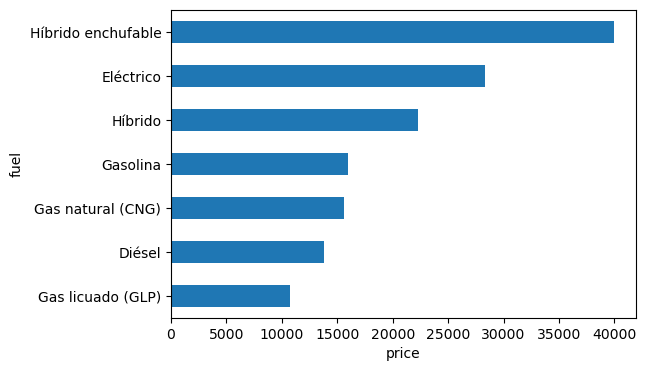

In [19]:
plt.figure(figsize = (6,4))
df.groupby('fuel')['price'].mean().sort_values().plot.barh(xlabel = 'price');

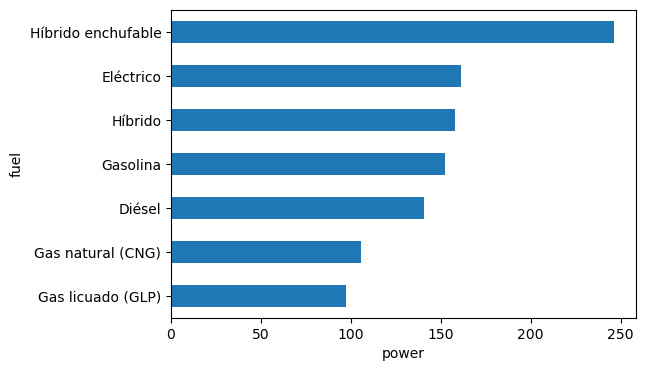

In [20]:
plt.figure(figsize = (6,4))
df.groupby('fuel')['power'].mean().sort_values().plot.barh(xlabel = 'power');

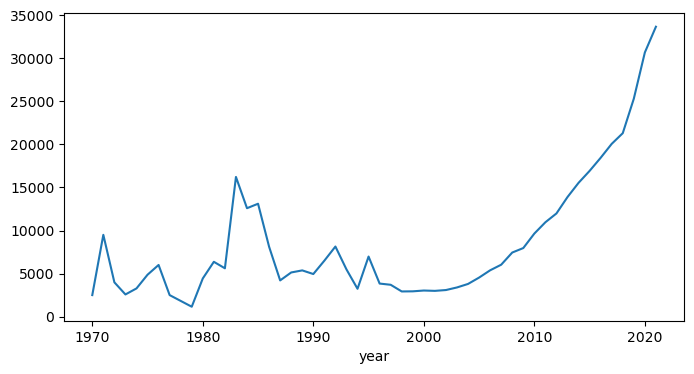

In [21]:
plt.figure(figsize = (8,4))
df.groupby('year')['price'].mean().sort_index().plot();

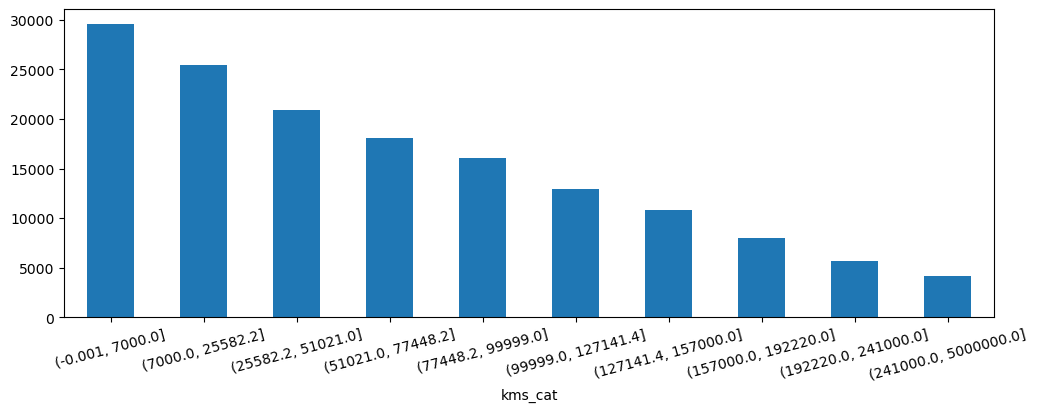

In [22]:
plt.figure(figsize = (12,4))
df.groupby('kms_cat')['price'].mean().sort_index().plot.bar(rot = 15);

In [23]:
plt.figure(figsize = (12,4))
pd.DataFrame(df.groupby('shift')['price'].mean().sort_index().reset_index())

,shift,price
0,Automático,26093.953164
1,Manual,10387.072650


<Figure size 1200x400 with 0 Axes>

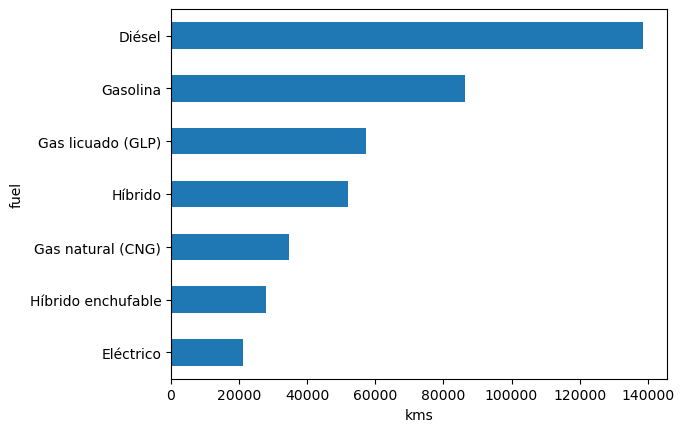

In [24]:
df.groupby('fuel')['kms'].mean().sort_values().plot.barh(xlabel = 'kms');

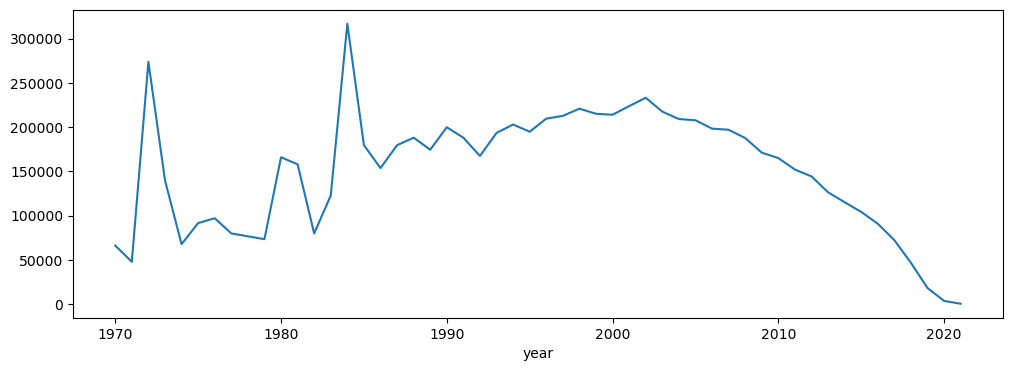

In [25]:
plt.figure(figsize = (12,4))
df.groupby('year')['kms'].mean().sort_index().plot();

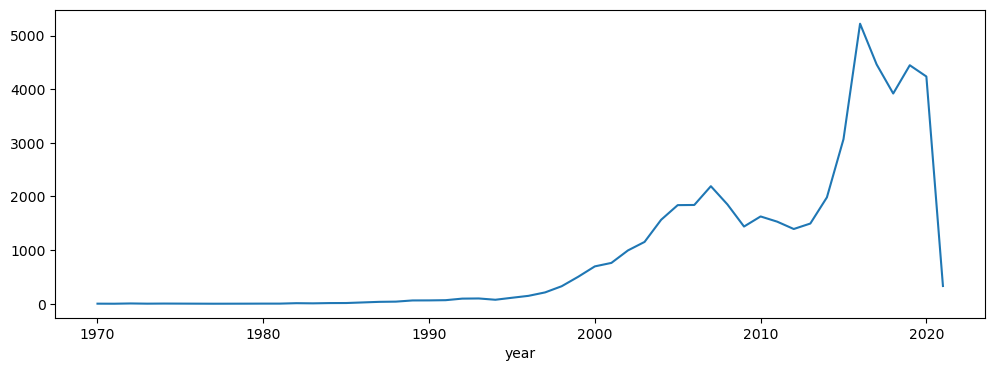

In [26]:
plt.figure(figsize = (12,4))
df.groupby('year')['price'].count().sort_index().plot();

## Datos comerciales

- Distribución de vendedores profesionales-particulares
- Top 10 vendedores con más anuncios. Precio medio de anuncio en vendedores profesionales. Hay diferencias significativas?
- Existen diferencias de precios entre vendedores profesionales y particulares?

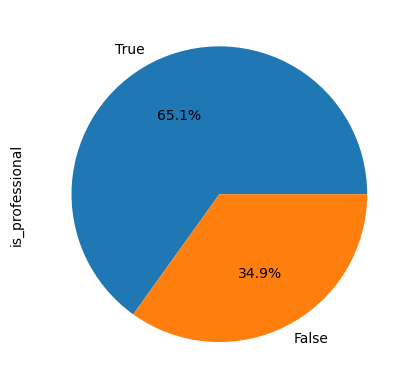

In [27]:
df.is_professional.value_counts().plot.pie(autopct='%1.1f%%');

In [28]:
dealers = df[
    df['dealer'].isin(df[df.is_professional == True].dealer.value_counts().head(10).index)
].groupby('dealer').agg({'url':'count','price':'mean','kms':'mean'}).sort_values(by = 'url', ascending = False)

dealers.rename(columns = {'url':'num_anuncios'}, inplace = True)
dealers.price = list(map(lambda x: round(x,2),dealers.price))
dealers.kms = list(map(lambda x: round(x),dealers.kms))
dealers

,num_anuncios,price,kms
dealer,,,
Ocasion Plus,883,15773.07,82101
CarNext.com,344,23001.16,67534
Flexicar Valencia,321,16677.41,96831
Flexicar Sevilla,290,17046.76,101390
Autohero,273,14557.61,54656
Flexicar Barcelona,263,16249.28,107166
Clicars,256,16790.64,59114
Flexicar Málaga,215,16252.27,104348
Ald Automotive,199,14325.63,79785


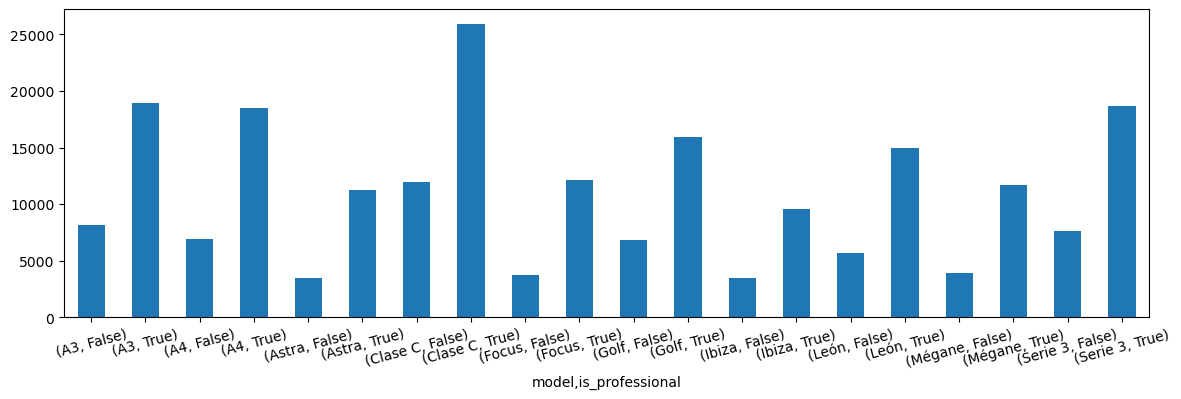

In [29]:
plt.figure(figsize = (14,4))
df[
    df['model'].isin(df['model'].value_counts().head(10).index)
].groupby(['model','is_professional'])['price'].mean().plot.bar(rot = 15);

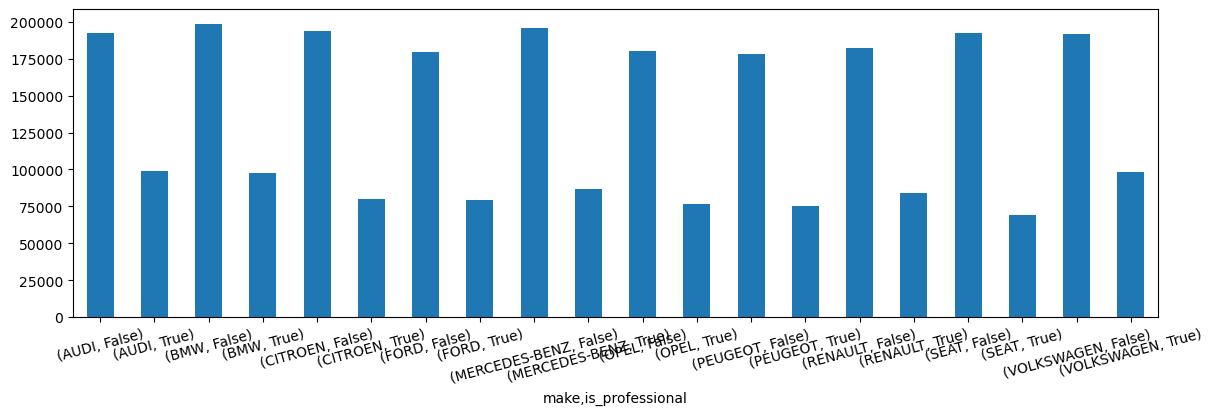

In [30]:
plt.figure(figsize = (14,4))
df[
    df['make'].isin(df['make'].value_counts().head(10).index)
].groupby(['make','is_professional'])['kms'].mean().plot.bar(rot = 15);

## Datos geográficos

- Distribución de anuncios por provincia
- Cuál es el precio medio por provincia?
- Top 10 de provincias más caras/baratas. Existen diferencias significativas?
- Distribución de combustibles por provincia. Hay algún dato significativo?
- Distribución de antigüedad por provincia. Hay algún dato significativo?
- Dónde se venden más coches eléctricos?

In [31]:
# Agrupar por provincia y fuel y contar el número de registros
grouped = df.groupby(['province', 'fuel'])['fuel'].count()

# Obtener el fuel con más registros por provincia
idx = grouped.groupby('province').idxmax()
result = grouped.loc[idx]

# Imprimir los resultados
result = pd.DataFrame(result.index.to_list(), columns = ['province','fuel'])
result

,province,fuel
0,A Coruña,Diésel
1,Albacete,Diésel
2,Alicante,Diésel
3,Almería,Diésel
4,Asturias,Diésel
5,Badajoz,Diésel
6,Baleares,Gasolina
7,Barcelona,Diésel
8,Burgos,Diésel
9,Cantabria,Diésel


In [32]:
mapa = gpd.read_file('../data/provincias-espanolas.geojson')

mapa.texto.replace({'Santa Cruz de Tenerife':'Tenerife','Islas Baleares':'Baleares','Gerona':'Girona','La Coruña':'A Coruña'}, inplace = True)

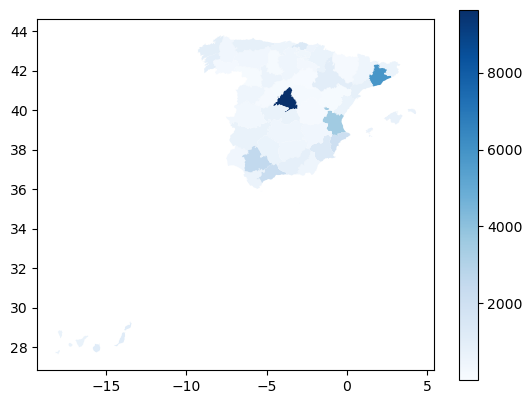

In [46]:
anuncios_provincia = pd.DataFrame(df.province.value_counts()).reset_index()

mapa_1 = mapa.merge(anuncios_provincia, left_on = 'texto', right_on = 'index', how = 'left')
mapa_1.drop(columns = 'index', inplace = True)
mapa_1.rename(columns = {'province':'num_anuncios'}, inplace = True)

mapa_1.plot(column = 'num_anuncios', cmap='Blues', linewidth=0.8, legend = True);

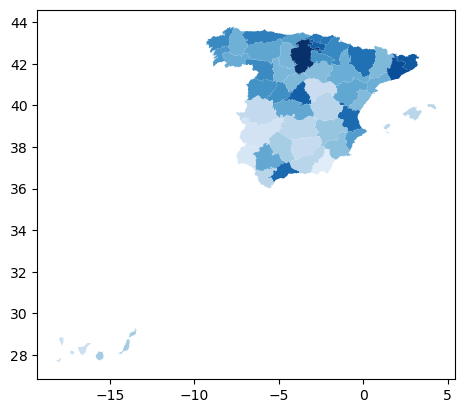

In [34]:
precio_provincia = pd.DataFrame(df.groupby('province')['price'].mean().sort_values(ascending = False)).reset_index()

mapa_2 = mapa.merge(precio_provincia, left_on = 'texto', right_on = 'province', how = 'left')
mapa_2.drop(columns = 'province', inplace = True)

mapa_2.plot(column = 'price', cmap='Blues', linewidth=0.8);

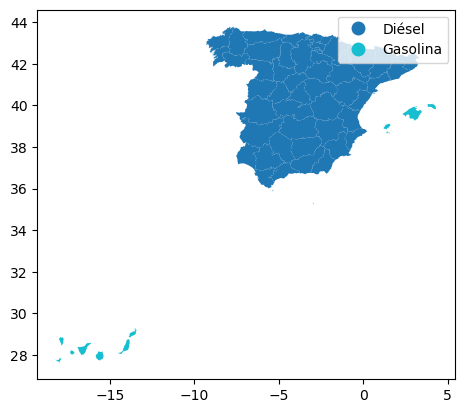

In [35]:
mapa_3 = mapa.merge(result, left_on = 'texto', right_on = 'province', how = 'left')
mapa_3.drop(columns = 'province', inplace = True)

mapa_3.plot(column = 'fuel', linewidth=0.8, legend = True);

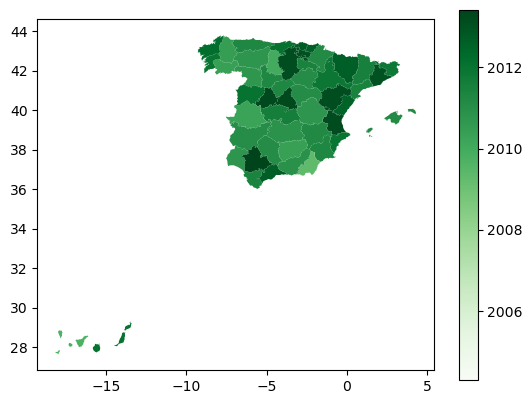

In [36]:
anos_provincia = pd.DataFrame(df.groupby('province')['year'].mean().sort_values(ascending = False)).reset_index()

mapa_4 = mapa.merge(anos_provincia, left_on = 'texto', right_on = 'province', how = 'left')
mapa_4.drop(columns = 'province', inplace = True)

mapa_4.plot(column = 'year', cmap='Greens', linewidth=0.8, legend = True);

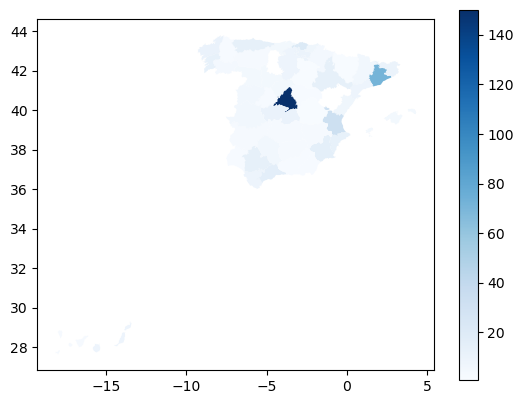

In [37]:
electricos_provincia = pd.DataFrame(df[df.fuel == 'Eléctrico'].province.value_counts()).reset_index()

mapa_5 = mapa.merge(electricos_provincia, left_on = 'texto', right_on = 'index', how = 'left')
mapa_5.drop(columns = 'index', inplace = True)
mapa_5.rename(columns = {'province':'num_anuncios'}, inplace = True)

mapa_5.plot(column = 'num_anuncios', cmap='Blues', linewidth=0.8, legend = True);